<a href="https://colab.research.google.com/github/AntoniosDimitriou/TMDL_2024/blob/main/Assignment_3_Empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [62]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [63]:
df = pd.read_csv('movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

The following columns have null values: homepage, overview, release_date, runtime, tagline. We could substitute the missing values with the means of their category.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [65]:
df = df[['original_title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  4803 non-null   object
 1   overview        4800 non-null   object
 2   genres          4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [66]:
df = df.dropna(subset=['overview']) # drop na values
df = df.reset_index(drop = True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [67]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
      index = unique_labels.index(label)
      out[index] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row['proc_genres'], unique_genres))

df["one_hot_genres"] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 18335.14it/s]


Verify that one-hot encodings are indeed as expected

In [68]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

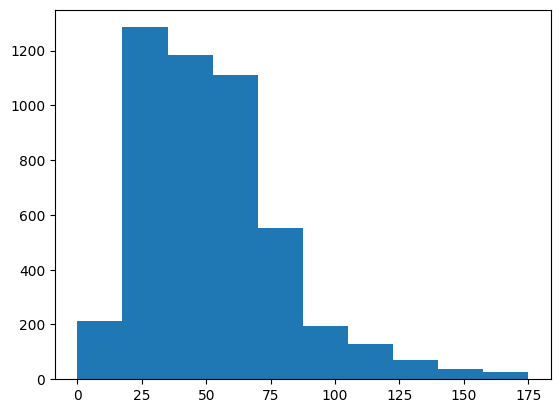

In [69]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for overview in df['overview']:
    processed_overview = remove_punctuation(overview.lower())
    processed_overviews.append(processed_overview)
df["pr_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = [len(overview.split()) for overview in df["pr_overview"]]

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(df["overview_len"])
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview is zero, while the longest is 175. I would choose a lenght between 25 and 75 (a good estimate is 50), as before and after those lengths we see a steep drop in the frequency with which we see the other lengths.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [70]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["pr_overview"] = df["pr_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))

# print to verify
print(df)

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4794                                    Cavite   
4795                               El Mariachi   
4797                 Signed, Sealed, Delivered   
4798                          Shanghai Calling   
4799                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                          

<ipython-input-70-043e8ccb1e4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pr_overview"] = df["pr_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [71]:
# hint: store all words for all movies in a set, change it to a list and sort
word_set = set()
for overview in df["pr_overview"]:
    word_set.update(overview.split())
word_list = sorted(list(word_set))
vocab_len = len(word_list)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [72]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = []
    for word in row["pr_overview"]:
      word_encode = encode_labels(word, word_list)
      sentence_encode.append(word_encode)
    sentence_encode = np.sum(sentence_encode, axis=0)
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
print(df['one_hot_overview'])

100%|██████████| 4707/4707 [01:47<00:00, 43.64it/s]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

16 * 4.707 = 75.312 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

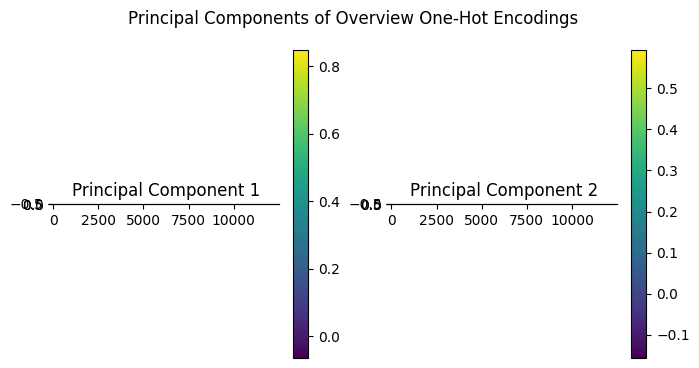

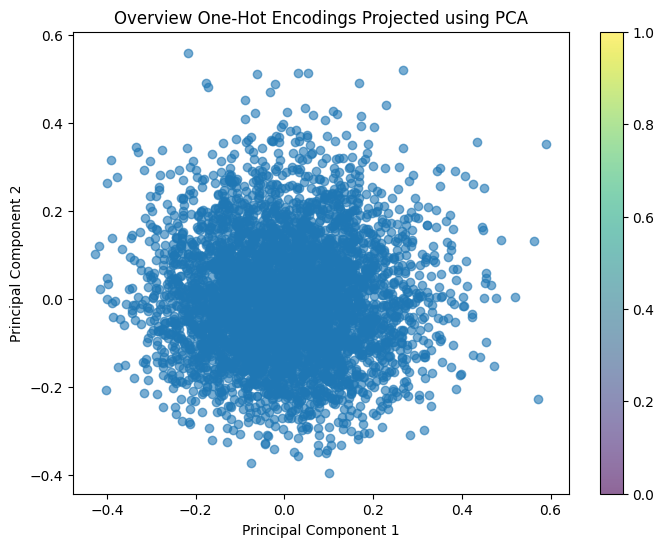

In [74]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
overview_array = np.array(df['one_hot_overview'].tolist())

overview_array = np.array(df['one_hot_overview'].tolist())
overview_array = overview_array / np.max(overview_array)
overview_array = overview_array.reshape(-1, overview_array.shape[1])


pca = PCA(n_components=2)
overview_pca = pca.fit_transform(overview_array)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for i, c in enumerate(pca.components_):
    pos = ax[i].imshow(c.reshape(1, 12493)) # I could not reshape the data to fit in any shape, so i just made it a 1 by 12493
    plt.colorbar(pos, ax=ax[i])
    ax[i].set_title(f"Principal Component {i+1}")
plt.suptitle('Principal Components of Overview One-Hot Encodings')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(overview_pca[:, 0], overview_pca[:, 1], alpha=0.6)
plt.colorbar()
plt.title('Overview One-Hot Encodings Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

There is no correlation in the plot. It should also be stated that all the data is centered around (0, 0).

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

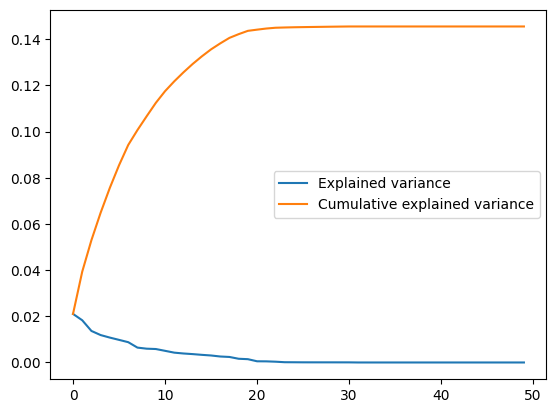

In [75]:
pca = PCA(n_components=50)
pca.fit(overview_array)

explained_variance = pca.explained_variance_
cumulative_variance = np.cumsum(explained_variance)


plt.plot(explained_variance, label="Explained variance")
plt.plot(cumulative_variance, label="Cumulative explained variance")
plt.legend()
plt.show()


0.14

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

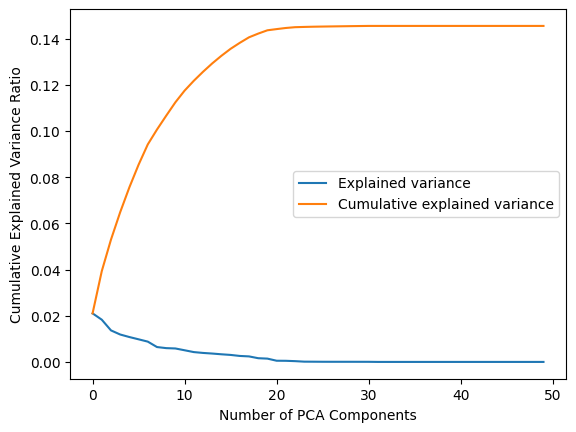

In [76]:
pca = PCA(n_components=50)
pca.fit(overview_array)

explained_variance = pca.explained_variance_
cumulative_variance = np.cumsum(explained_variance)


plt.plot(explained_variance, label="Explained variance")
plt.plot(cumulative_variance, label="Cumulative explained variance")
plt.legend()
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [78]:
from sklearn.decomposition import PCA

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = 0.0
n_components_80_percent = 0

for i, variance_ratio in enumerate(explained_variance_ratio):
    cumulative_variance += variance_ratio
    if cumulative_variance >= 0.8:
        n_components_80_percent = i + 1
        break

print(n_components_80_percent)


11


11

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [79]:
n_dims = 11
pca = PCA(n_components=n_dims)
one_hot_overview_encodings = pd.get_dummies(df['overview'])

pca.fit(one_hot_overview_encodings)
labels_pca = pca.transform(one_hot_overview_encodings)[:, :n_dims]
df["overview_pca"] = labels_pca[:, 0]

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [80]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(labels_pca)

y_preds = kmeans.predict(labels_pca)# get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
cluster_0 = df[df["cluster_kmeans"] == 0]
print(cluster_0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                 original_title  \
19    The Hobbit: The Battle of the Five Armies   
43                         Terminator Salvation   
50          Prince of Persia: The Sands of Time   
58                                  Rush Hour 3   
68                                     Iron Man   
...                                         ...   
4658                             The Big Parade   
4675               The Business of Fancydancing   
4678                               Reality Show   
4696                              Lumea e a mea   
4791               Sanctuary: Quite a Conundrum   

                                               overview  \
19    Immediately after the events of The Desolation...   
43    All grown up in post-apocalyptic 2018, John Co...   
50    A rogue prince reluctantly joins forces with a...   
58    After an attempted assassination on Ambassador...   
68    After being held captive in an Afghan cave, bi...   
...                              

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

No, not necessarily, although a lot of them can fit under the same category (eg. both men in black 3 and avengers: age of ultron can be classsified as fiction/ science fiction movies), some are completely unrelated (eg. skyfall).

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

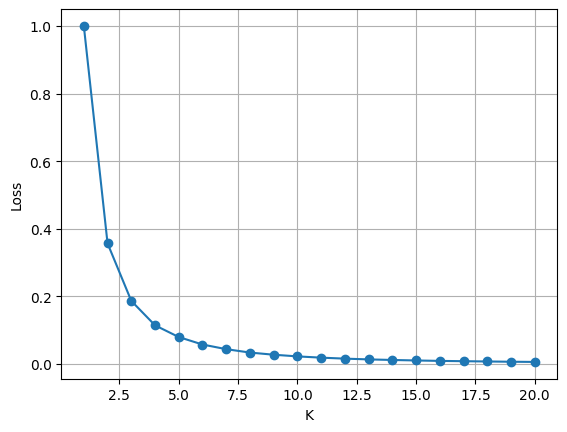

In [81]:
loss = []
overview_pca_2d = np.array(df["overview_pca"]).reshape(-1, 1)

k_values = range(1, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(overview_pca_2d)
    loss.append(kmeans.inertia_)

plt.plot(cluster_sizes, loss, marker='o')
plt.xlabel('K')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [82]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(labels_pca)

cluster_gmm = gmm.predict(labels_pca)
df["cluster_gmm"] = cluster_gmm

cluster_id = 4
cluster_elements = df[df["cluster_gmm"] == cluster_id]
print(cluster_elements)


                   original_title  \
16                   The Avengers   
49               The Great Gatsby   
81                     Maleficent   
206           Clash of the Titans   
212        The Day After Tomorrow   
...                           ...   
4731                     Echo Dr.   
4755                   The Signal   
4760  Smiling Fish & Goat On Fire   
4777                  Dutch Kills   
4797    Signed, Sealed, Delivered   

                                               overview  \
16    When an unexpected enemy emerges and threatens...   
49    An adaptation of F. Scott Fitzgerald's Long Is...   
81    The untold story of Disney's most iconic villa...   
206   Born of a god but raised as a man, Perseus is ...   
212   After years of increases in the greenhouse eff...   
...                                                 ...   
4731  When their home security system malfunctions, ...   
4755  Three college students on a road trip across t...   
4760  Two brothers share

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

This clustering seems better than that of the previous question. The movies in each cluster are now closer related to each other.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

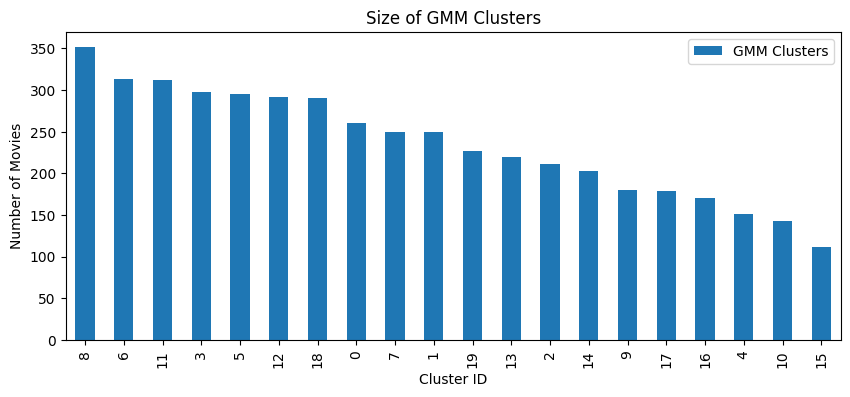

In [83]:
cluster_counts = df['cluster_gmm'].value_counts()

plt.figure(figsize=(10, 4))
cluster_counts.plot(kind='bar', label='GMM Clusters')

plt.xlabel('Cluster ID')
plt.ylabel('Number of Movies')
plt.title('Size of GMM Clusters')
plt.legend()

plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

There is a significance difference in the clusters, when comparing cluster 18 to any other cluster. But, when comparing the other clusters, it becomes obvious that they are much more similar, and thus uniform.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [87]:
prev_watch = "Avatar"

cluster_kmeans = df[df['original_title'] == prev_watch]['cluster_kmeans'].values[0] # find what cluster index Avatar falls into for k-means
cluster_gmm = df[df['original_title'] == prev_watch]['cluster_gmm'].values[0]# find what cluster index Avatar falls into for gmm

# print out similar movies
print("Movies similar to Avatar (K-means):")
print(df[df['cluster_kmeans'] == cluster_kmeans]['original_title'].values)

print("\nMovies similar to Avatar (GMM):")
print(df[df['cluster_gmm'] == cluster_gmm]['original_title'].values)

Movies similar to Avatar (K-means):
['Avatar' 'The Lone Ranger' 'Men in Black 3' 'X-Men: The Last Stand'
 'Cars 2' 'Green Lantern' 'The Legend of Tarzan' 'Pearl Harbor'
 'Ratatouille' 'Troy' 'Rise of the Guardians'
 'Night at the Museum: Secret of the Tomb' 'Oblivion' 'The Croods'
 'Windtalkers' "The Huntsman: Winter's War" 'Speed 2: Cruise Control'
 'The Lord of the Rings: The Return of the King' 'What Lies Beneath'
 "You Don't Mess with the Zohan" 'The Saint' 'Enchanted' 'Creepshow'
 'Mission: Impossible' 'Mighty Joe Young' 'What Dreams May Come'
 'The Brothers Grimm' 'Immortals' 'Signs' 'Cars' 'The Sum of All Fears'
 'Ice Age' 'Due Date' 'Hop' 'Meet the Fockers' 'Paycheck' 'Almost Famous'
 'DragonHeart' 'American Wedding' 'Elizabethtown' 'Grindhouse'
 'From Paris with Love' 'Stepmom' 'Ninja Assassin' 'K-PAX' '3:10 to Yuma'
 'Scary Movie 3' 'Coach Carter' 'Johnny English' 'Babylon A.D.' 'The Firm'
 'Here Comes the Boom' 'Lord of War' 'The Odd Life of Timothy Green'
 'Aliens vs Predat

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

The are not bad, but I personally would prefer shorter lists than the ones provided. Thus due to the amount of movie reccomendations, I would label these systems as "not optimal".

**Q6.3** How would you try making the recommender systems better?

1. Provide fewer reccomendations
2. Provide more targeted reccomendations, which can be done through:
    - Increasing the amount of filters (duration, year of release, etc.).
    - Taking into consideration other movies that the individual liked (cross referencing two movies that the individual likes can allow for better, more targeted reccomendations).

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

Taking into consideration other movies that the individual liked, for example, cross referencing two movies that the individual likes can allow for better, more targeted reccomendations. For instance if an individual liked "Emancipation" but not "12 years a slave", then the model could see what the two movies differed in, and thus see what not to reccomend next time.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [89]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
avatar_index = df[df['original_title'] == 'Avatar'].index[0]
prev_watch_enc = df.loc[avatar_index, 'overview_pca']

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row['overview_pca']))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar", ascending=False) # sort df
print(df.head()) # print to verify

                           original_title  \
0                                  Avatar   
1950  La véritable histoire du Chat Botté   
3795    The Last Time I Committed Suicide   
1953                             Ironclad   
1954                             Waterloo   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1950  A free adaptation of Charles Perrault's famous...   
3795  Neal Cassady is living the beat life during th...   
1953  In the year 1215, the rebel barons of England ...   
1954  After defeating France and imprisoning Napoleo...   

                                                 genres proc_genres  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...      Action   
1950  [{"id": 10751, "name": "Family"}, {"id": 12, "...      Family   
3795                      [{"id": 18, "name": "Drama"}]       Drama   
1953  [{"id": 10749, "name": "Romance"}, {"id": 12, ...     History   
1954  [{"id": 36, "

All movies have a cos_sim_to_avatar of 1.0, indicating high similarity. Thus this method is useful for finding movies with similar themes and content.

That being said, it is hard to say if it is better than the other models, as that would depend on the specific requirements mentioned in the code.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [90]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(max_features=100)
X = tfidf_vectorizer.fit_transform(df_train['overview'])

X_train, X_test, y_train, y_test = train_test_split(X, df_train['proc_genres'], test_size=0.2)

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

train_preds = rf_classifier.predict(X_train)
test_preds = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
X_test_tfidf = tfidf_vectorizer.transform(df_test['overview'])

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()

print("RECOMMENDATIONS:")
for idx in range(3):
    print("Movie:", df_test.iloc[idx]['original_title'])
    print("Predicted Genres:", test_predictions[idx])
    print()

Train Accuracy: 0.999667994687915
Test Accuracy: 0.24701195219123506

RECOMMENDATIONS:
Movie: The Kids Are All Right
Predicted Genres: Comedy

Movie: Ninja Assassin
Predicted Genres: Drama

Movie: Confidence
Predicted Genres: Drama



Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

Model building:I first needed to turn the data into a form that could be processed so I used the tfidf_vectorizer. Then I split the data into a training and a testing set, so I can train the model and then run a test. Then after deciding to use Random Forest, due to its ability to proccess multi-dimensional data, I kept on changing the values of the parameters to see which ones gave the highest accuracy.


Possible improvements: This model could be improved by having it take more variables into consideration that individuals find very important, but are not mentioned in the data. Such variables include the films location of filming, or portraid time period, as there are many individuals who are big fans of a specific time period (eg. medievel times), and thus are likely to like anything related to that.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)